# In this notebook, we have analyzed dataset probably Walmart Dataset from Kaggle for predicting trends on sales of Walmart Store.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Walmart.csv")

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [2]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
# Check for missing values
df.isna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Check datetime object
df["Date"].dtype


dtype('O')

In [6]:
# Renamed Columns for simplicity
df = df.rename(columns={"Unemployment":"Unemployment_Rate", "CPI": "Consumer_Per_Index"})


In [7]:
# Rounding Values to 2 for simplicity
df["Consumer_Per_Index"] = df["Consumer_Per_Index"].round(2)

In [ ]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Consumer_Per_Index,Unemployment_Rate
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.34,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.46,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.58,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.70,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.86,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.01,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.17,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.33,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.33,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.31,8.667


In [ ]:
# Converting str object into Datetime for simplicity and extracting things such as features for datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")



In [10]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Consumer_Per_Index,Unemployment_Rate
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.10,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.24,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.29,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.32,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.35,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.38,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.22,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.02,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.82,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.62,7.808


In [ ]:
# Check whether dates are not null or null
df[df["Date"].isna()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Consumer_Per_Index,Unemployment_Rate


In [26]:
df["Year"] = df["Date"].dt.year

In [36]:
yearly_sales = df.groupby("Year")["Weekly_Sales"].sum().reset_index()

yearly_sales

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


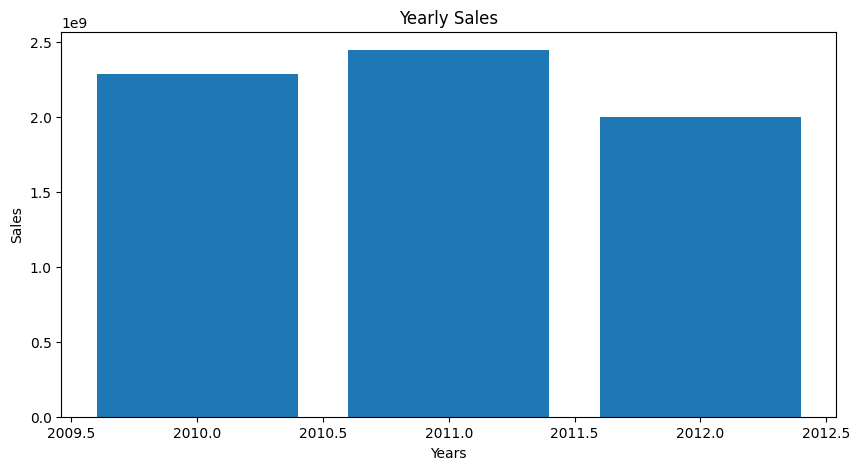

In [ ]:
# What are the yearly sales
plt.figure(figsize=(10, 5))
yearly_sales = df.groupby("Year")["Weekly_Sales"].sum().reset_index()

years = yearly_sales["Year"]
sales = yearly_sales["Weekly_Sales"]
plt.bar(years, sales)
plt.xlabel("Years")
plt.ylabel("Sales")
plt.title("Yearly Sales")
plt.show()

> The above chart shows that sales rose in 2011 and have small downfall in 2012 as compared to 2010 and 2011

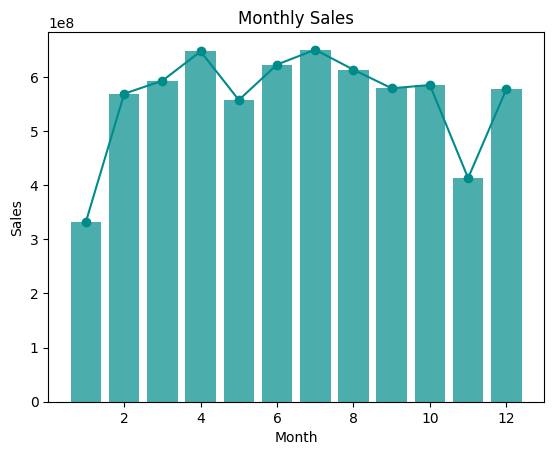

In [59]:
# What are the monthly sales
df["Month"] = df["Date"].dt.month
monthly_sales = df.groupby("Month")["Weekly_Sales"].sum().reset_index()
month = monthly_sales["Month"]
m_sales = monthly_sales["Weekly_Sales"]

plt.bar(month, m_sales, color="darkcyan", alpha=0.7)
plt.plot(month, m_sales, color="darkcyan", marker="o")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [55]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Consumer_Per_Index,Unemployment_Rate,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.10,8.106,2010,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.24,8.106,2010,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.29,8.106,2010,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.32,8.106,2010,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.35,8.106,2010,3,4
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.38,8.106,2010,3,4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.22,8.106,2010,3,4
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.02,8.106,2010,3,4
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.82,7.808,2010,4,4
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.62,7.808,2010,4,4


> The dataset above is cleaned and changed, What changes were made:

* Date converted into Datetime object
* Changed names of CPI to Consumer Per Index and Unemployment to Unemployment Rate for simplicity :)
* Extracted Month, Day and WeekDay from the Date
* Visualized Monthly and Yearly Sales in Bar Chart